<>:112: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:200: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:202: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:204: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:206: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:208: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:210: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:212: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:112: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:200: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:202: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:204: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:206: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:208: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:210: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:212: SyntaxWarning: "is" with a literal. Did you mea

[np.float64(9.581621961441744), np.float64(9.596287905193448), np.float64(9.60136815920398), np.float64(9.592682578247821), np.float64(9.610201596536328), np.float64(9.582231351906534), np.float64(9.558602877874801)]
[np.float64(8.445972986493247), np.float64(8.383882986063199), np.float64(8.383869047619047), np.float64(8.395877944325482), np.float64(8.36775), np.float64(8.31285), np.float64(8.19865)]
[np.float64(39.77829002514669), np.float64(39.803328685953296), np.float64(39.82804726368159), np.float64(39.65378019151065), np.float64(39.90840211067515), np.float64(39.36962382847606), np.float64(38.97355798794736)]
[np.float64(24.498082374520592), np.float64(24.23947840485718), np.float64(24.16202380952381), np.float64(24.13693790149893), np.float64(23.8042), np.float64(23.37445), np.float64(22.61545)]
[312.  331.5 351.  370.5 390.  409.5 429. ]
the gain of fa_rss over bm_sa is 0.2118522575619818
the gain of fa_rss over fa_cut is -0.033551719187924496
the gain of fa_rss over sap_bm is

/var/folders/gv/wwx54pg167n49b11qvywyt_80000gn/T/ipykernel_33416/454468628.py:112: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if info is 'service_blocking_rate':
/var/folders/gv/wwx54pg167n49b11qvywyt_80000gn/T/ipykernel_33416/454468628.py:200: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if info is 'total_path_length':
/var/folders/gv/wwx54pg167n49b11qvywyt_80000gn/T/ipykernel_33416/454468628.py:202: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif info is 'service_blocking_rate':
/var/folders/gv/wwx54pg167n49b11qvywyt_80000gn/T/ipykernel_33416/454468628.py:204: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif info is 'rss_total_metric':
/var/folders/gv/wwx54pg167n49b11qvywyt_80000gn/T/ipykernel_33416/454468628.py:206: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif info is 'avrage_gsnr':
/var/folders/gv/wwx54pg167n49b11qvywyt_80000gn/T/ipykernel_33416/454468628.py:208: SyntaxWarning: "is" with a literal. Did you mean "

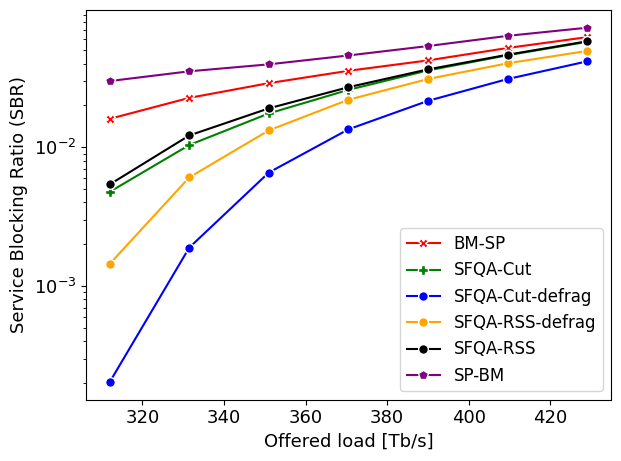

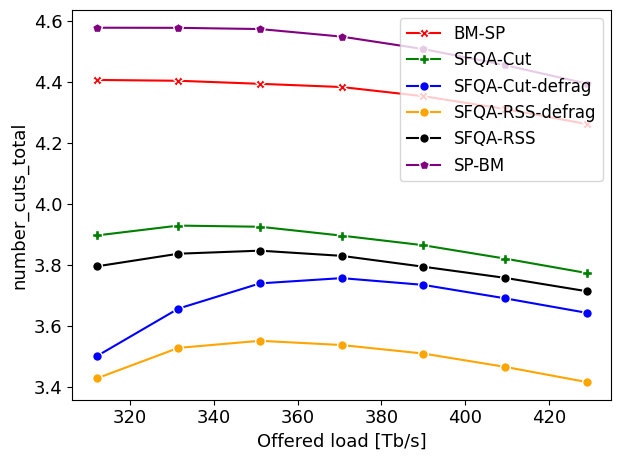

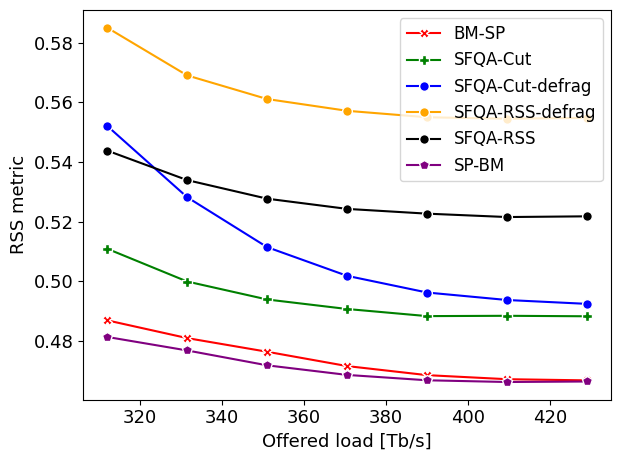

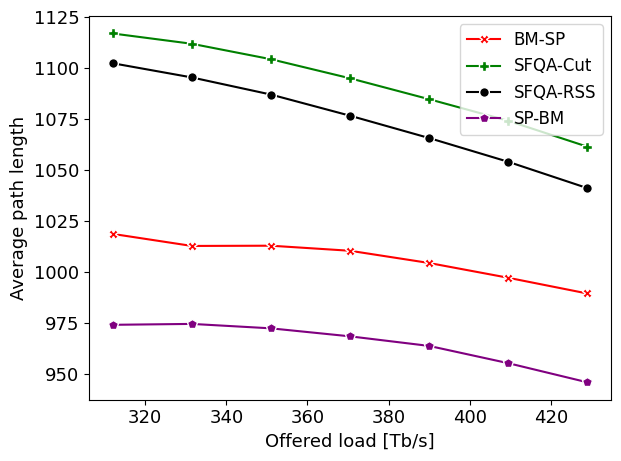

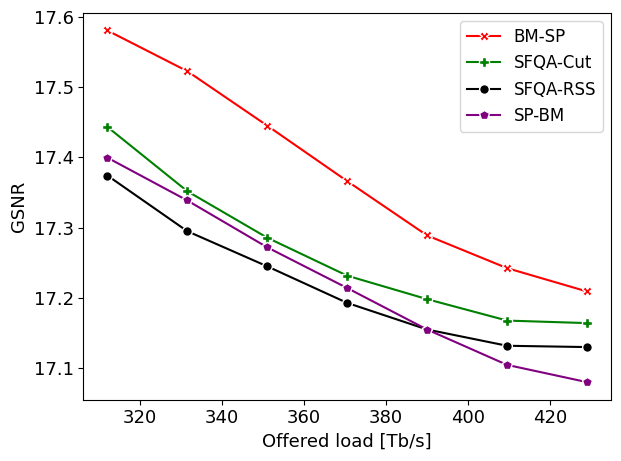

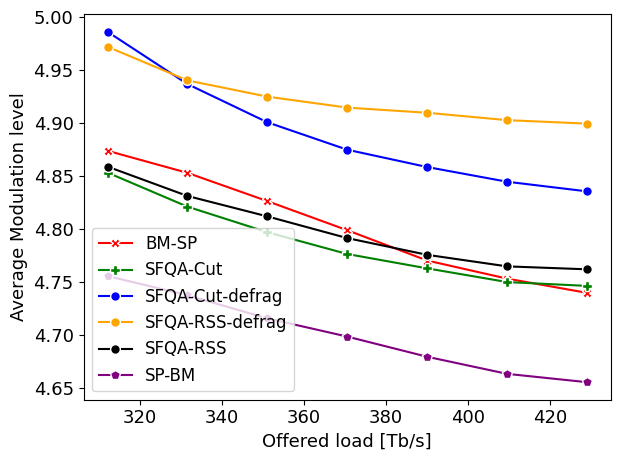

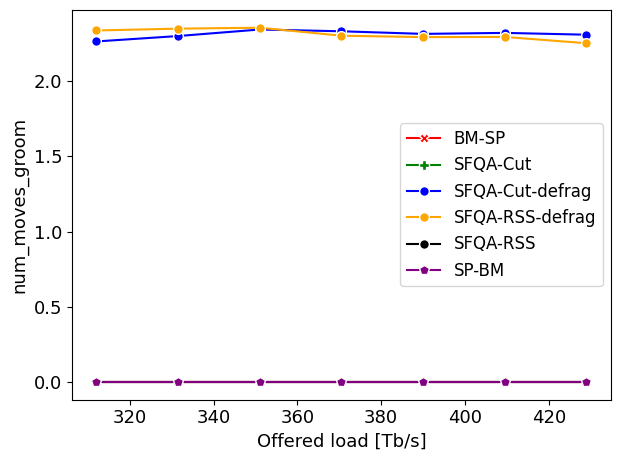

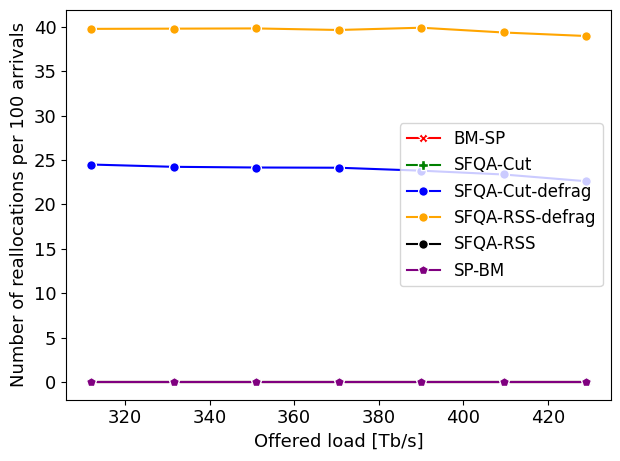

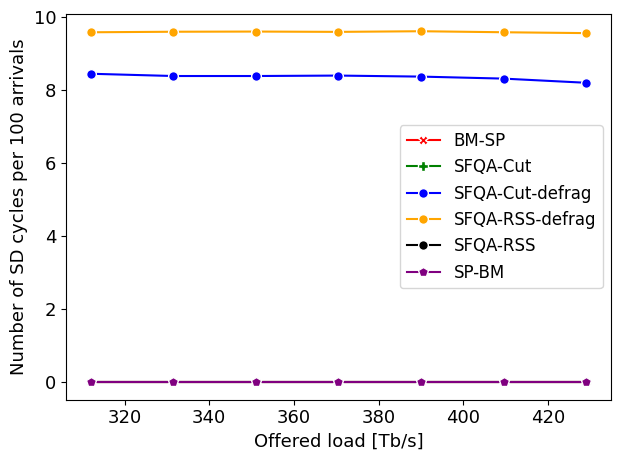

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import os
# from IPython.core.display import clear_output
import numpy as np
import time

heuristic_log_dir = 'phy_frag_rmsa2/jpn-results-new'

topology_name = 'Germany50'
topology_name = 'jpn12'
figures_floder = f'./{heuristic_log_dir}/figures'
os.makedirs(figures_floder, exist_ok=True)

min_load = 960
max_load = 1361
step_length = 60
steps = int((max_load - min_load) / step_length) + 1
loads = np.zeros(steps)
episode_length = 205

metrics = [
    'episode_service_blocking_rate',
    'service_blocking_rate',
    'episode_bit_rate_blocking_rate',
    'number_cuts_total',
    'rss_total_metric',
    'total_path_length',
    'avrage_gsnr',
    'average_mod_level',
    'num_moves',
    'num_defrag_cycle',
    'num_moves_groom'
    
]

sap_ff_loads = {metric: [] for metric in metrics}
sap_bm_loads = {metric: [] for metric in metrics}
bm_fa_cut_loads = {metric: [] for metric in metrics}
bm_fa_rss_loads = {metric: [] for metric in metrics}
bm_sa_ff_loads = {metric: [] for metric in metrics}
bm_fa_rss_df_loads = {metric: [] for metric in metrics}
bm_fa_cut_df_loads = {metric: [] for metric in metrics}
traffic_type = 1

for load_counter, load_traffic in enumerate(range(min_load, max_load, step_length)):
    bm_fa_cut = pd.read_csv(
        f'./{heuristic_log_dir}/logs_{load_traffic}_{episode_length}/BM-FA-Cut-modified.monitor.csv',
        skiprows=1)
    bm_fa_rss = pd.read_csv(
        f'./{heuristic_log_dir}/logs_{load_traffic}_{episode_length}/BM-FA-RSS.monitor.csv', skiprows=1)
    bm_sa_ff = pd.read_csv(
        f'./{heuristic_log_dir}/logs_{load_traffic}_{episode_length}/BM-SA-FF.monitor.csv',
        skiprows=1)
    bm_fa_cut_df = pd.read_csv(
        f'./{heuristic_log_dir}/logs_{load_traffic}_{episode_length}-defragmeentation-cut/BM-FA-Cut-modified.monitor.csv',
        skiprows=1)
    bm_fa_rss_df = pd.read_csv(
        f'./{heuristic_log_dir}/logs_{load_traffic}_{episode_length}-defragmeentation-rss/BM-FA-RSS.monitor.csv', skiprows=1)
    # sap_ff = pd.read_csv(
    #     f'./{heuristic_log_dir}/logs_{load_traffic}_{episode_length}/SAP-FF.monitor.csv',
    #     skiprows=1)

    sap_bm = pd.read_csv(
        f'./{heuristic_log_dir}/logs_{load_traffic}_{episode_length}/BM-FA-SAPBM.monitor.csv',
        skiprows=1)
    loads[load_counter] = load_traffic
    for info in ['episode_service_blocking_rate','service_blocking_rate',
                'episode_bit_rate_blocking_rate', 'number_cuts_total', 'rss_total_metric',
                 'total_path_length', 'avrage_gsnr', 'average_mod_level', 'num_moves', 'num_moves_groom', 'num_defrag_cycle' ]:
        bm_fa_cut_loads[info].append(np.mean(bm_fa_cut[info]))
        #             exhuastic_highest_loads[info].append(np.mean(exhaustic_highest[info]))
        bm_fa_rss_loads[info].append(np.mean(bm_fa_rss[info]))
        bm_sa_ff_loads[info].append(np.mean(bm_sa_ff[info]))
        bm_fa_rss_df_loads[info].append(np.mean(bm_fa_rss_df[info]))
        bm_fa_cut_df_loads[info].append(np.mean(bm_fa_cut_df[info]))
        # sap_ff_loads[info].append(np.mean(sap_ff[info]))
        sap_bm_loads[info].append(np.mean(sap_bm[info]))

bm_fa_rss_df_loads['num_defrag_cycle']= [x / 2 for x in bm_fa_rss_df_loads['num_defrag_cycle']]
bm_fa_cut_df_loads['num_defrag_cycle']= [x / 2 for x in bm_fa_cut_df_loads['num_defrag_cycle']]
print(bm_fa_rss_df_loads['num_defrag_cycle'])
print(bm_fa_cut_df_loads['num_defrag_cycle'])
print(bm_fa_rss_df_loads['num_moves'])
print(bm_fa_cut_df_loads['num_moves'])
# print(loads)
# print(f"SBR for highest-first-fit is {highest_loads['service_blocking_per_hundred_arrivals']}")


# percentage = []
# percentage1 = []
# for i in range(len(no_df_loads['service_blocking_per_hundred_arrivals'])):
#     percentage.append((no_df_loads['service_blocking_per_hundred_arrivals'][i] -
#                        exhuastic_oldest_loads['service_blocking_per_hundred_arrivals'][i]) /
#                       no_df_loads['service_blocking_per_hundred_arrivals'][i])
# for i in range(len(no_df_loads['service_blocking_per_hundred_arrivals'])):
#     percentage1.append((oldest_loads['service_blocking_per_hundred_arrivals'][i] -
#                         exhuastic_oldest_loads['service_blocking_per_hundred_arrivals'][i]) /
#                        oldest_loads['service_blocking_per_hundred_arrivals'][i])

# print(f"the exhaustic vs. no df-{[round(item, 2) for item in percentage]}")
# print(f"the exhaustic vs. oldest-{[round(item, 2) for item in percentage1]}")

markersize = 7
offered_load = loads*325*(0.001)
print(offered_load)
for info in ['service_blocking_rate',
                 'number_cuts_total', 'rss_total_metric',
                 'total_path_length','avrage_gsnr', 'average_mod_level','num_moves_groom', 'num_moves', 'num_defrag_cycle']:
    plt.figure()
    if info is 'service_blocking_rate':
    # if info is 'service_blocking_rate' or info is 'episode_service_blocking_rate':
        # print(f"{np.mean(bm_sa_ff_loads[info])}")
        # print(np.mean(bm_fa_cut_loads[info]))
        # print(np.mean(bm_fa_rss_loads[info]))
        # # print(np.mean(sap_ff_loads[info]))
        # print(np.mean(sap_bm_loads[info]))
        av_bm_sa = np.mean(bm_sa_ff_loads[info])
        av_bm_fa_cut = np.mean(bm_fa_cut_loads[info])
        av_bm_fa_rss = np.mean(bm_fa_rss_loads[info])
        av_sap_bm = np.mean(sap_bm_loads[info])
        av_bm_fa_cut_df = np.mean(bm_fa_cut_df_loads[info])

        print(f"the gain of fa_rss over bm_sa is {(av_bm_sa - av_bm_fa_rss)/av_bm_sa}")
        print(f"the gain of fa_rss over fa_cut is {(av_bm_fa_cut - av_bm_fa_rss)/av_bm_fa_cut}")
        print(f"the gain of fa_rss over sap_bm is {(av_sap_bm - av_bm_fa_rss)/av_sap_bm}")
        print(f"the gain of fa_cut_df over fa_cut is {(av_bm_fa_cut - av_bm_fa_cut_df)/av_bm_fa_cut}")
        
        ax_bm_sa_ff = plt.semilogy(offered_load, bm_sa_ff_loads[info], label='BM-SP', marker='X', markersize=markersize,
                             markeredgecolor='white', color = 'red')

        # ax_bm_sa_ff_df = plt.semilogy(offered_load, bm_sa_ff_df_loads[info], label='BM-SP-defrag(rss)', marker='X', markersize=markersize,
        #                      markeredgecolor='white')

        ax_bm_fa_cut = plt.semilogy(offered_load, bm_fa_cut_loads[info], label='SFQA-Cut', marker='P', markersize=markersize,
                                 markeredgecolor='white', color = 'green')

        ax_bm_fa_cut_df = plt.semilogy(offered_load, bm_fa_cut_df_loads[info], label='SFQA-Cut-defrag', marker='o',
                                           markersize=markersize, markeredgecolor='white', color = 'blue')
        ax_bm_fa_rss_df = plt.semilogy(offered_load, bm_fa_rss_df_loads[info], label='SFQA-RSS-defrag', marker='o',
                                           markersize=markersize, markeredgecolor='white', color = 'orange')
        
        
        ax_bm_fa_rss = plt.semilogy(offered_load, bm_fa_rss_loads[info], label='SFQA-RSS', marker='o',
                                           markersize=markersize, markeredgecolor='white', color = 'black')

        # ax_sap_ff = plt.semilogy(loads, sap_ff_loads[info], label='SAP_FC', marker='p', markersize=markersize,
        #                           markeredgecolor='white')
        ax_sap_bm = plt.semilogy(offered_load, sap_bm_loads[info], label='SP-BM', marker='p', markersize=markersize,
                                  markeredgecolor='white', color = 'purple')
    else:
        # if info is 'total_path_length':
            # av_bm_sa = np.mean(bm_sa_ff_loads[info])
            # av_bm_fa_cut = np.mean(bm_fa_cut_loads[info])
            # av_bm_fa_rss = np.mean(bm_fa_rss_loads[info])
            # av_sap_bm = np.mean(sap_bm_loads[info])
            # print(f"the gain of bm_sa over fa_rss is {(-av_bm_sa + av_bm_fa_rss)/av_bm_fa_rss}")
            # print(f"the gain of bm_sa over fa_rs is {(-av_sap_bm + av_bm_fa_rss)/av_bm_fa_rss}")
            # print(f"the gain of fa_rss over fa_cut is {(av_bm_fa_cut - av_bm_fa_rss)/av_bm_fa_cut}")
            # print(f"the gain of fa_rss over sap_bm is {(av_sap_bm - av_bm_fa_rss)/av_sap_bm}")
        
        ax_bm_sa_ff = plt.plot(offered_load, bm_sa_ff_loads[info], label='BM-SP', marker='X', markersize=markersize,
                         markeredgecolor='white', color = 'red')
        # ax_bm_sa_ff_df = plt.plot(offered_load, bm_sa_ff_df_loads[info], label='BM-SP-defrag', marker='X', markersize=markersize,
        #                  markeredgecolor='white')


        ax_bm_fa_cut = plt.plot(offered_load, bm_fa_cut_loads[info], label='SFQA-Cut', marker='P', markersize=markersize,
                             markeredgecolor='white', color = 'green')
        if info not in ['total_path_length', 'avrage_gsnr']:
            ax_bm_fa_cut_df = plt.plot(offered_load, bm_fa_cut_df_loads[info], label='SFQA-Cut-defrag', marker='o',
                                               markersize=markersize, markeredgecolor='white', color = 'blue')
            ax_bm_fa_rss_df = plt.plot(offered_load, bm_fa_rss_df_loads[info], label='SFQA-RSS-defrag', marker='o',
                                               markersize=markersize, markeredgecolor='white', color = 'orange')

        ax_bm_fa_rss = plt.plot(offered_load, bm_fa_rss_loads[info], label='SFQA-RSS', marker='o',
                                       markersize=markersize, markeredgecolor='white', color = 'black')

        # ax_sap_ff = plt.plot(loads, sap_ff_loads[info], label='SAP_FC', marker='p', markersize=markersize,
        #                       markeredgecolor='white')
        ax_sap_bm = plt.plot(offered_load, sap_bm_loads[info], label='SP-BM', marker='p', markersize=markersize,
                                  markeredgecolor='white', color = 'purple')
        plt.tight_layout()
    #
    # print(f"the bm-sa-ff for {info} is {np.mean(bm_sa_ff_loads[info])} ")
    # print(f"the bm_fa_cut for {info} is {np.mean(bm_fa_cut_loads[info])} ")
    # print(f"the bm_fa_rss for {info} is {np.mean(bm_fa_rss_loads[info])} ")
    # print(f"the sap_ff for {info} is {np.mean(sap_ff_loads[info])} ")

    plt.xlabel('Offered load [Tb/s]')
    # if info == 'service_blocking_per_hundred_arrivals':
    #     plt.ylabel('Service Blocking Ratio (SBR)', fontsize=13)
    # elif info == 'episode_frag_metric':
    #     plt.ylabel('RSS metric', fontsize=13)
    # else:
    #     plt.ylabel(info)
    plt.tight_layout()
    plt.legend(loc='upper right')
    if info is 'total_path_length':
        plt.ylabel('Average path length')
    elif info is 'service_blocking_rate':
        plt.ylabel('Service Blocking Ratio (SBR)')
    elif info is 'rss_total_metric':
        plt.ylabel('RSS metric')
    elif info is 'avrage_gsnr':
        plt.ylabel('GSNR')
    elif info is 'average_mod_level':
        plt.ylabel('Average Modulation level')
    elif info is 'num_moves':
        plt.ylabel('Number of reallocations per 100 arrivals')
    elif info is 'num_defrag_cycle':
        plt.ylabel('Number of SD cycles per 100 arrivals')
    else:
        plt.ylabel(info)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.rcParams.update({'font.size': 13})
    plt.savefig(f'{figures_floder}/{topology_name}-{info}.pdf')
    plt.savefig(f'{figures_floder}/{topology_name}-{info}.svg')



